<h1 style="color:DodgerBlue;">IIM-K Capestone Project Models - Customer Segmentation</h1>


<strong style="color:Tomato;"> Load Libraries </strong>    


In [18]:
#import libraries for data handling
import os
import pandas as pd
import numpy as np

#import for visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

#import for Linear regression
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Dependencies

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<h1 style="color:DodgerBlue;">Create Model - Customer Segmentation</h1>

<strong style="color:Tomato;"> Load Customer Demographic data </strong>    


In [2]:
import pandas as pd
cust_base1 = pd.read_csv("C:\Vibhaas\Artist of Analytics\ADSM IIM K\CapeStone Project\Data\customer_demographic1.csv")
cust_base1.head()

,customer_id,cust_lvl,age,AgeGroup,Credit_limit_Group,c_tier,c_city_grp,c_Region_E,c_Region_N,c_Region_S,c_Region_W,mar_status_M,mar_status_S,gender_M,customer_country_India,cust_freq,cust_spent,change_city,change_state,change_country
0,10000020,3,49,5,0,1,1,0,0,1,0,0,0,1,1,30,836.27,17,17,0
1,10000196,3,25,4,0,1,1,0,0,0,1,1,0,1,1,102,9628.78,102,89,0
2,10000366,1,38,4,6,1,1,0,0,0,1,1,0,1,1,38,4965.60,31,29,0
3,10000413,3,30,4,0,1,1,0,0,0,1,0,1,0,1,93,12690.24,93,93,0
4,10000510,3,47,5,0,1,1,1,0,0,0,1,0,0,1,122,5139.79,122,122,0


In [4]:
# Drop Columns from right side
cust_base2 = cust_base1.copy()
cust_base2.drop(['customer_id'], axis=1, inplace=True)
cust_base2.head()



,cust_lvl,age,AgeGroup,Credit_limit_Group,c_tier,c_city_grp,c_Region_E,c_Region_N,c_Region_S,c_Region_W,mar_status_M,mar_status_S,gender_M,customer_country_India,cust_freq,cust_spent,change_city,change_state,change_country
0,3,49,5,0,1,1,0,0,1,0,0,0,1,1,30,836.27,17,17,0
1,3,25,4,0,1,1,0,0,0,1,1,0,1,1,102,9628.78,102,89,0
2,1,38,4,6,1,1,0,0,0,1,1,0,1,1,38,4965.60,31,29,0
3,3,30,4,0,1,1,0,0,0,1,0,1,0,1,93,12690.24,93,93,0
4,3,47,5,0,1,1,1,0,0,0,1,0,0,1,122,5139.79,122,122,0


<strong style="color:Tomato;"> Customer Distribution by age</strong>    


<AxesSubplot:xlabel='age', ylabel='cust_freq'>

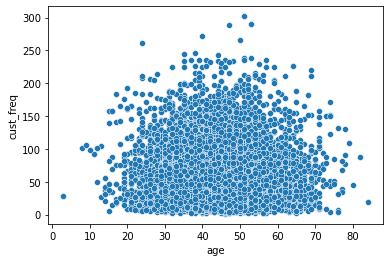

In [5]:
sns.scatterplot(data=cust_base2, x="age", y="cust_freq")

<AxesSubplot:xlabel='age', ylabel='cust_spent'>

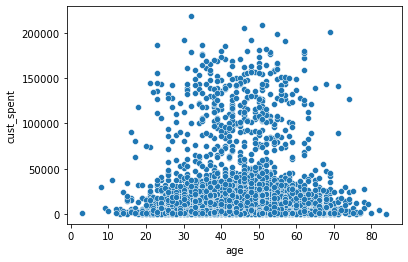

In [6]:
sns.scatterplot(data=cust_base2, x="age", y="cust_spent")

<strong style="color:Tomato;">Clustering with K Means</strong>    


In [7]:
!pip install kneed

In [8]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

Inertia 364505804398.5605
Iterations :  42
[3 3 3 2 3]


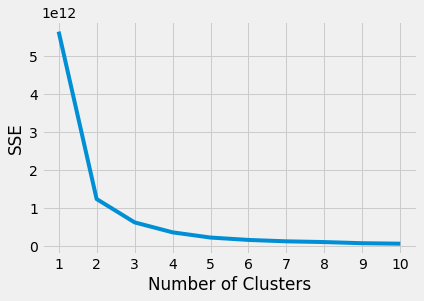

Best K Value as per Elbow graph 2


In [9]:
# Create Base model
kmeans = KMeans(init="random",
                n_clusters=4,
                n_init=10,
                max_iter=300,
                random_state=42
                )
# Fit Kmeans Model
kmeans.fit(cust_base2)

# Check Intertial values
print("Inertia", kmeans.inertia_)
print("Iterations : ", kmeans.n_iter_)
print(kmeans.labels_[:5])

# Build Elbow Graph
kmeans_kwargs = {
 "init": "random",
 "n_init": 10,
 "max_iter": 300,
 "random_state": 42,
 }
 
 # A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cust_base2)
    sse.append(kmeans.inertia_)

# Plot Elbow graph    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

# FInd Best K value 
kl = KneeLocator( range(1, 11), sse, curve="convex", direction="decreasing" )
print("Best K Value as per Elbow graph", kl.elbow)

<strong style="color:Tomato;"> Create Clusters with K-Means </strong>    


<AxesSubplot:xlabel='age', ylabel='cust_freq'>

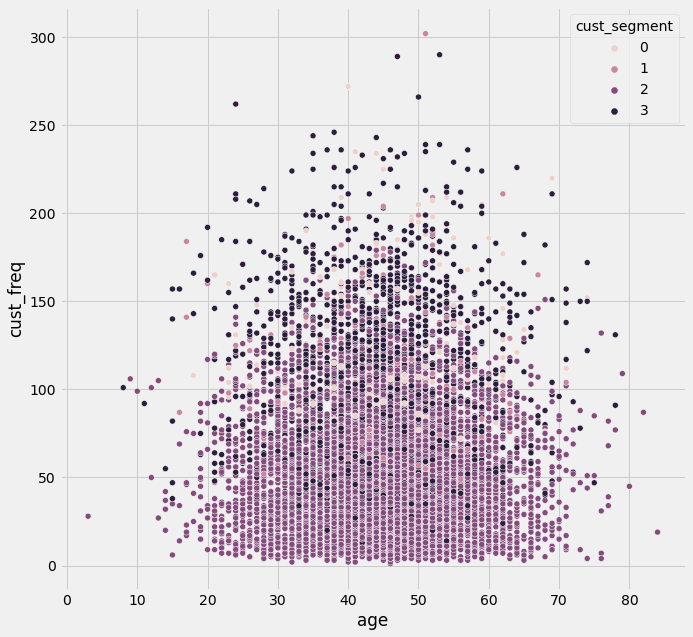

In [10]:
kmeans = KMeans(init="random",
                n_clusters=4,
                n_init=10,
                max_iter=300,
                random_state=42
                )

kmeans.fit(cust_base2)

predict=kmeans.predict(cust_base2)

cust_base2['cust_segment'] = pd.Series(predict, index=cust_base2.index)
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=cust_base2, x="age", y="cust_freq", hue="cust_segment")

<strong style="color:Tomato;"> Plot Charts with Custommer Segmentations</strong>    


<AxesSubplot:xlabel='age', ylabel='cust_spent'>

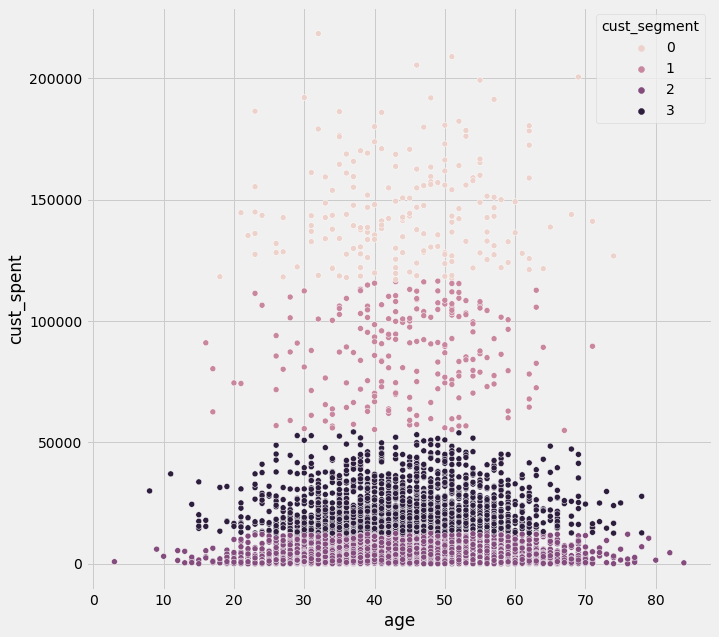

In [11]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=cust_base2, x="age", y="cust_spent", hue="cust_segment")

<AxesSubplot:xlabel='age', ylabel='cust_lvl'>

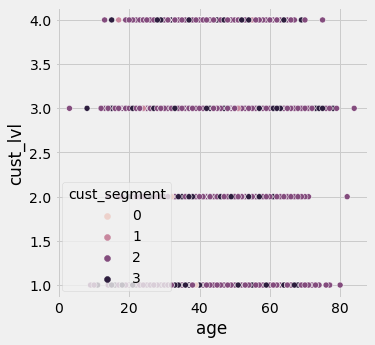

In [12]:
fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=cust_base2, x="age", y="cust_lvl", hue="cust_segment")

<AxesSubplot:xlabel='age', ylabel='change_city'>

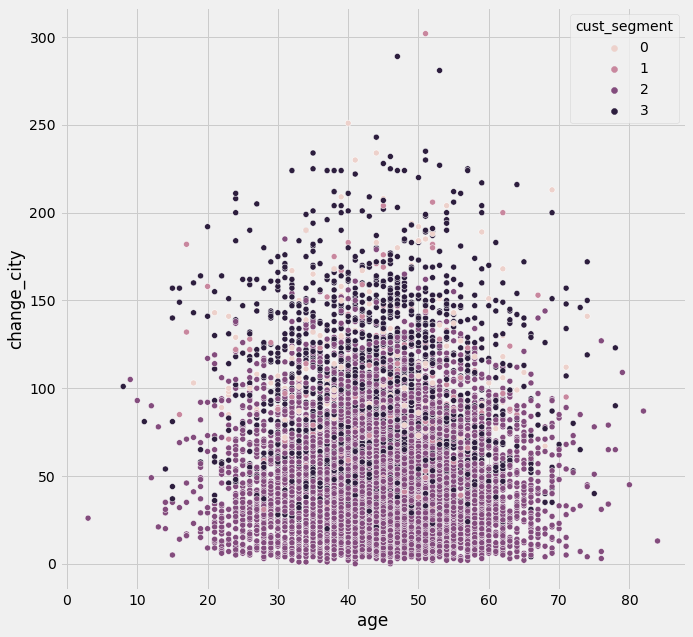

In [14]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=cust_base2, x="age", y="change_city", hue="cust_segment")